In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pdb3 import lsext
import tol_colors as tc
import mplhelv
from tqdm.notebook import tqdm
from deeptime.markov.msm import MaximumLikelihoodMSM

In [1]:
pwd

'/home/pdb3/SMO_CHL_Transport/6XBL_CHL/Analysis/CHL_xyz_3D'

In [3]:
tol_cmap = tc.tol_cmap('rainbow_PuBr')

In [13]:
pkls = lsext('./pkl/','.pkl')[0]
CHL_angle = lsext('../CHL_entry/CHL_entry_npy_try2/','.pkl')[0]
total_data = [pkls, CHL_angle]
data = []
for i in range(len(CHL_angle)):
    for s,t in enumerate(total_data):
        y = pickle.load(open(t[i],'rb'))
        if s==0:
            z = y.copy()
        else:
            z = np.hstack((z,y))
    data.append(z)

In [28]:
# for b in range(130):
#     btsp_object = pickle.load(open(f'../remaking_MSM/btsp_msmobj/msmobj_btsp_{b}.pkl','rb'))
    

In [16]:
len(data)

10467

In [5]:
len(data)

10467

In [6]:
data[0].shape

(1000, 5)

In [17]:
datac = np.concatenate(data).astype('float16')
datac.shape

(15148047, 5)

In [8]:
import numpy as np
from scipy import stats
# kde = stats.gaussian_kde(datac.T)
# density = kde(datac.T)
indices = np.where(np.isnan(datac[:,3]))[0].reshape(-1,1)
datac2 = np.delete(datac, indices, axis=0)
datac2.shape

(15148038, 5)

In [9]:
datac2.shape, datac.shape

((15148038, 5), (15148047, 5))

In [10]:
import pyemma

Text(0, 0.5, 'y-coordinate of CHL COM')

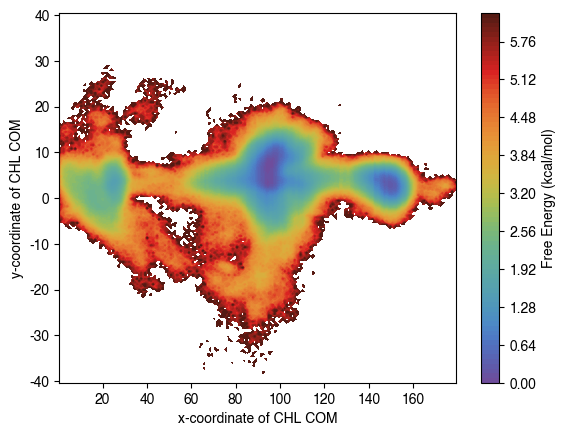

In [88]:
a,b,c = pyemma.plots.plot_free_energy(datac2[:,3]*180/np.pi,datac2[:,1]*10,legacy=False,nbins=200,cmap=tol_cmap,cbar_label='Free Energy (kcal/mol)',kT=2.479/4.184)
# b.set_xlim(-40,40)
# b.set_ylim(-40,40)
b.set_xlabel('x-coordinate of CHL COM')
b.set_ylabel('y-coordinate of CHL COM')

In [29]:
def gap(x):
    m = np.max(x)
    n = np.min(x)
    gap = (m-n)/14
    return gap
def free_energy_plot(x,y,xmul=1,ymul=1,weights=None,fig_wid=10,fig_hig=7,vmax=5,xtickgap=2, ytickgap=2):
    R = 0.001987
    T = 310
    cmap = tol_cmap
    x_data = x*xmul
    y_data = y*ymul
    Max_energy = vmax
    x_bins=250
    y_bins=250
    x_data_min =  np.min(x_data)
    y_data_min =  np.min(y_data)
    x_data_max =  np.max(x_data)
    y_data_max =  np.max(y_data)
    x_hist_lim_low =  x_data_min -0.5
    y_hist_lim_low =  y_data_min -0.5
    x_hist_lim_high = x_data_max +0.5
    y_hist_lim_high = y_data_max  +0.5
    hist= np.histogram2d(x_data,y_data, bins=[x_bins,y_bins],
				 range = [[x_hist_lim_low,x_hist_lim_high],[y_hist_lim_low,y_hist_lim_high]],
				 density= True,weights=weights)
    prob_density = hist[0]
    prob_density = hist[0]
    xedge = hist[1]
    yedge = hist[2]
    x_bin_size = xedge[1]-xedge[0]
    y_bin_size = yedge[1]-yedge[0]
    free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)
    min_free_energy = np.min(free_energy)
    delta_free_energy = free_energy - min_free_energy
    xx = [(xedge[i]+xedge[i+1])/2 for i in range(len(xedge)-1)]
    yy = [(yedge[i]+yedge[i+1])/2 for i in range(len(yedge)-1)]
    fig, axs = plt.subplots(1,1,figsize=(fig_wid,fig_hig))
    #cd = axs.contourf(xx,yy,delta_free_energy.T, vmin=0.0, vmax=Max_energy,cmap=cmap)
    contours = np.linspace(0,Max_energy,Max_energy+1)
    cdl = axs.contour(xx,yy,delta_free_energy.T,levels=range(int(Max_energy)+1),colors='k',linewidths = 0.2)
    cd = axs.contourf(xx,yy,delta_free_energy.T,np.linspace(0,Max_energy,30), vmin=0.0, vmax=Max_energy,cmap=cmap)
    cbar = fig.colorbar(cd,ticks=range(int(Max_energy)+1))
    cbar.ax.set_yticklabels(range(int(Max_energy)+1),size=20)
    cbar.ax.set_ylabel('Free Energy (kcal/mol)',fontsize=20)
    print(np.min(x_data),np.max(x_data),np.min(y_data),np.max(y_data))
    xlimlow = np.min(x_data)//10*10
    ylimlow = np.min(y_data)//10*10+10
    xlimhigh = np.max(x_data)//10*10+10
    ylimhigh = np.max(y_data)//10*10
    print(xlimlow, xlimhigh, ylimlow, ylimhigh)
    axs.set_xlim(xlimlow, xlimhigh)
    axs.set_ylim(ylimlow, ylimhigh)
    xticks = np.arange(xlimlow,xlimhigh+gap(x_data),xtickgap).astype(np.int64)
    yticks = np.arange(ylimlow,ylimhigh+gap(y_data),ytickgap).astype(np.int64)
    axs.set_xticks(xticks)
    axs.set_xticklabels(xticks)
    axs.set_yticks(xticks)
    axs.set_yticklabels(xticks)
    axs.tick_params(axis='both',labelsize=20)
    axs.grid(True,ls='--',alpha=0.7)
    # fig.show()
    return fig,axs,xx,yy,delta_free_energy

/tmp/ipykernel_37273/3654921636.py:32: RuntimeWarning: divide by zero encountered in log
  free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)


-38.84 39.1 -40.56 40.66
-40.0 40.0 -40.0 40.0


Text(0, 0.5, 'Cholesterol y-coordinate(Å)')

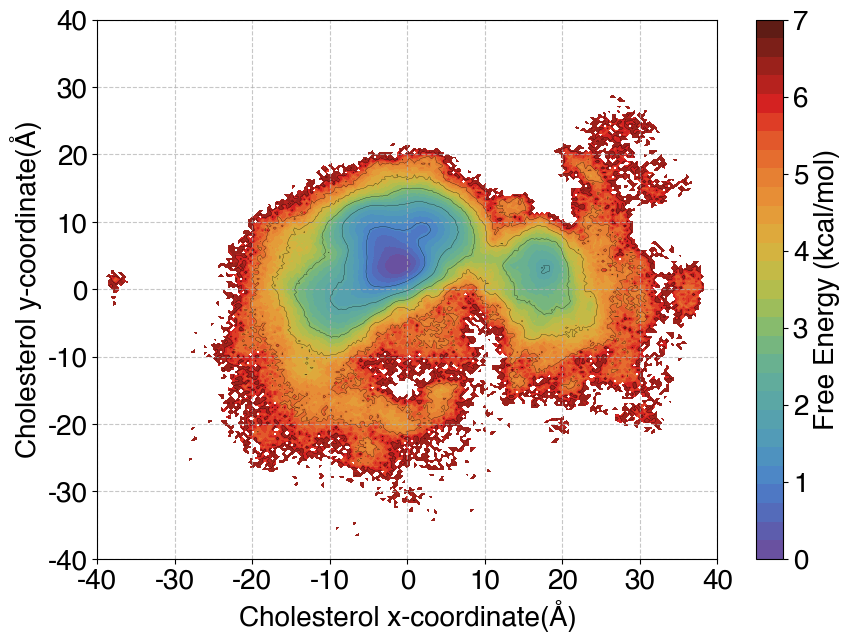

In [30]:
a,b,x,y,e = free_energy_plot(datac[:,0]*10,datac[:,1]*10,xtickgap=10,ytickgap=10,vmax=7)
# b.set_xlim(-40,40)
# b.set_ylim(-40,40)
b.set_xlabel('Cholesterol x-coordinate(Å)',fontsize=20)
b.set_ylabel('Cholesterol y-coordinate(Å)',fontsize=20)
# a.savefig('./CHL_xy.png',dpi=300,transparent=True)
# a.savefig('./CHL_xy.svg',dpi=300,transparent=True)

# a.tight_layout()

/tmp/ipykernel_37273/3284952518.py:5: RuntimeWarning: invalid value encountered in cos
  cd = axs.contourf(x,y,1/(np.cos(e.T/8))**2/3,np.linspace(0,Max_energy,50), vmin=0.0, vmax=Max_energy,cmap=cmap)


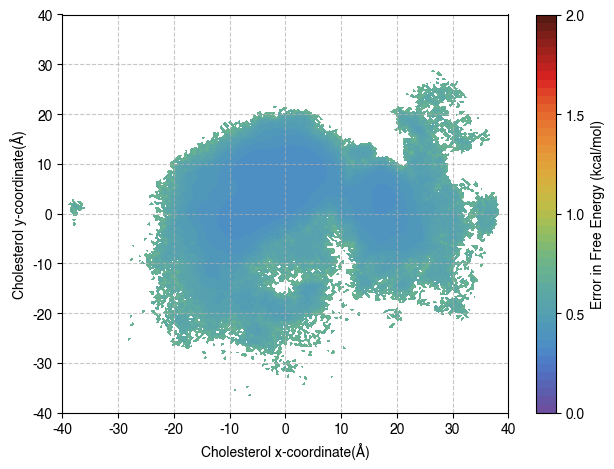

In [71]:
fig,axs = plt.subplots()
Max_energy=2
cmap = tc.tol_cmap('rainbow_PuBr')
# cdl = axs.contour(x,y,e.T/5,levels=range(int(Max_energy)+1),colors='k',linewidths = 0.2)
cd = axs.contourf(x,y,1/(np.cos(e.T/8))**2/3,np.linspace(0,Max_energy,50), vmin=0.0, vmax=Max_energy,cmap=cmap)
cb = fig.colorbar(cd)
cb.ax.set_yticks(np.arange(0,2.1,0.5))
cb.ax.set_ylabel('Error in Free Energy (kcal/mol)')
axs.set_xlim(-40,40)
axs.set_ylim(-40,40)
axs.grid(True,ls='--',alpha=0.7)
axs.set_xlabel('Cholesterol x-coordinate(Å)',fontsize=10)
axs.set_ylabel('Cholesterol y-coordinate(Å)',fontsize=10)
fig.tight_layout()
fig.savefig('./Error_Fig_Cholesterol_entry_only_C.png',transparent=True,dpi=300)

In [75]:
fig.get_size_inches()

array([6.4, 4.8])

/tmp/ipykernel_187261/1417687163.py:32: RuntimeWarning: divide by zero encountered in log
  free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)


0.0228 179.9 -40.56 40.66
0.0 180.0 -40.0 40.0


Text(0, 0.5, 'Cholesterol y-coordinate(Å)')

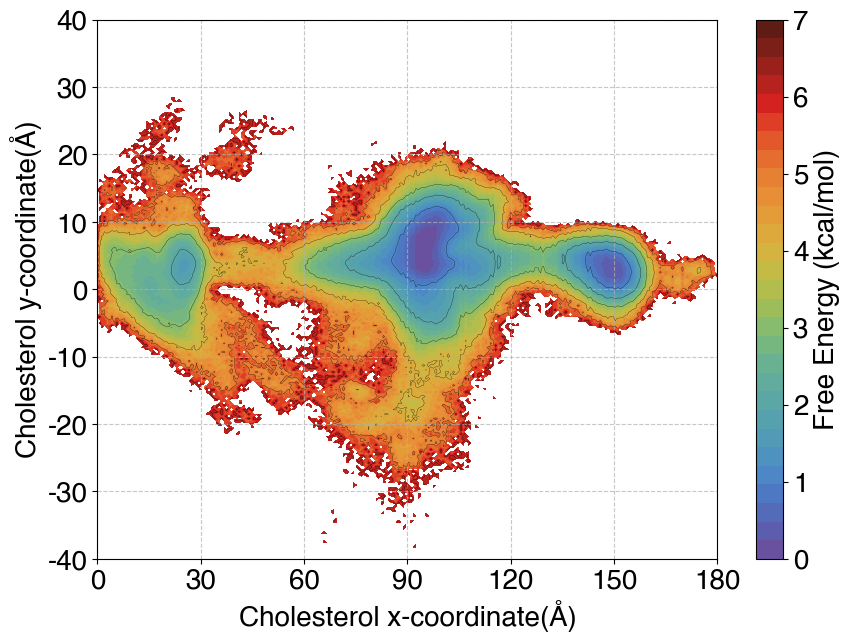

In [93]:
a,b = free_energy_plot(datac2[:,3]*180/np.pi,datac2[:,1]*10,xtickgap=30,ytickgap=10,vmax=7)
# b.set_xlim(-40,40)
b.set_ylim(-40,40)
b.set_yticks(np.arange(-40,41,10))
b.set_yticklabels(np.arange(-40,41,10))

b.set_xlabel('Cholesterol x-coordinate(Å)',fontsize=20)
b.set_ylabel('Cholesterol y-coordinate(Å)',fontsize=20)

In [10]:
pwd

'/home/pdb3/SMO_CHL_Transport/6XBL_CHL/Analysis/CHL_xyz_3D'

In [22]:
trajs_ = lsext('../CHL_entry/CHL_entry_npy_try2/','.pkl')[0]
for p in pkls:
trajs_ = [j.split('/')[-1].split('.')[0] for j in trajs_]

In [1]:
# trajs_